In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # go up one level to project/
from util import *
from loader.Dataset import VideoDataset
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from matplotlib import patches
%load_ext autoreload
%autoreload 2

In [3]:
data_path='/home/nfs/inf6/data/datasets/MOVi/movi_c/'
number_of_frames_per_video=24
max_objects_in_scene=11
video_dataset=VideoDataset(data_path,split='validation',number_of_frames_per_video=number_of_frames_per_video,max_objects_in_scene=max_objects_in_scene) # to load validation set
video_loader = DataLoader(dataset=video_dataset,
                            batch_size=60,
                            shuffle=True)

Data Loaded Successfully: len(self.coord_addresses)=250, len(self.mask_addresses)=250, len(self.rgb_addresses)=6000, len(self.flow_addresses)=6000


#### Image Extraction

In [29]:
fistVideo=True
iterator=iter(video_loader)
coms,bboxes,masks,rgbs,flows=next(iterator)
print(f"shapes: \r\n{coms.shape=},\r\n{bboxes.shape=},\r\n{masks.shape=},\r\n{rgbs.shape=},\r\n{flows.shape=}\r\n============================================")


shapes: 
coms.shape=torch.Size([60, 24, 11, 2]),
bboxes.shape=torch.Size([60, 24, 11, 4]),
masks.shape=torch.Size([60, 24, 128, 128]),
rgbs.shape=torch.Size([60, 24, 3, 128, 128]),
flows.shape=torch.Size([60, 24, 3, 128, 128])


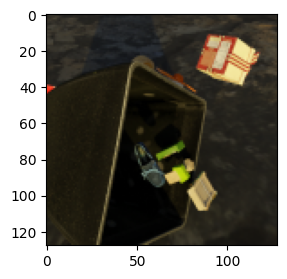

In [ ]:
batch_index=4
frame_index=6

extractor=ImageExtractor()
masked_imgs=extractor.extract_masked_images(rgbs[batch_index,frame_index],masks[batch_index,frame_index],max_objects_in_scene=max_objects_in_scene)


normal_rgb=(rgbs[batch_index,frame_index]-rgbs[batch_index,frame_index].min())/(rgbs[batch_index,frame_index].max()-rgbs[batch_index,frame_index].min())
plt.figure(figsize=(3, 3))
plt.imshow(normal_rgb.permute(1, 2, 0))
plt.show()

fig, ax = plt.subplots(masked_imgs.shape[0], 2, figsize=(4,  masked_imgs.shape[0]))  # Height scales with number of rows

for idx, mi in enumerate(masked_imgs):
    if(torch.all(mi == 0)):
        continue
    if(idx==0):
        ax[idx,0].set_title('masked objects')
    ax[idx,0].imshow((mi).clamp(0, 255).permute(1,2,0).byte().numpy())
    ax[idx,0].axis("off")
    ax[idx,1].imshow((masks[batch_index,frame_index]*(masks[batch_index,frame_index]==idx)).clamp(0, 255).byte().numpy())
    ax[idx,1].axis("off")
    
# Adjust layout to prevent overlap and optimize spacing
plt.tight_layout()

# Optionally increase DPI for higher resolution (useful for saving or zooming)
fig.set_dpi(150)

plt.show()

In [5]:
masked_imgs.shape

masked_imgs[0,0]


tensor([[217., 217., 217.,  ..., 170., 170., 171.],
        [216., 217., 216.,  ..., 178., 173., 176.],
        [217., 217., 216.,  ..., 180., 178., 180.],
        ...,
        [185., 185., 185.,  ..., 180., 179., 180.],
        [184., 184., 183.,  ..., 181., 180., 180.],
        [182., 182., 182.,  ..., 182., 182., 181.]])